Analyzing your Drug target

It is important to get a good feeling for the target you are about to study. This is where literature research comes into play. A good starting point is the original publication that your PDB code refers to. This will also give you further references. In addition, general reviews (Pubmed, Google Scholar) can be very helpful.

1.	Describe the target (your report should contain at least the following information):
-	Pathology (why are we interested in the target?)
-	Clinical drugs available (which drugs are on the market)
 	Also use ATC information to further describe the drugs. 
-	Protein information (what family of proteins is the target a member off, where is it located in the body?)

Related proteins (off-targets), based on sequence
Using Bio-informatics we are going to compare the target to other proteins. We use the primary structure (sequence) of the protein for this. Go to: http://www.uniprot.org/ 
2.	You can find the link to Uniprot on the sequence tab on the page of your target on https://www.rcsb.org/

3.	Alternatively, find the name of the target in the ‘Protein Knowledgebase’ (UniprotKB). From the list of hits you should select the correct one.

4.	Verify the ‘Accession’ number with your supervisor. Yellow stars means that it is a correct and reviewed target, use a reviewed one unless you are working on H5N1. 

In the case of the HIV targets, you have to make a sub selection within the POL polyprotein, do this by selecting the relevant domain in the list of domains below on the page.
RT -> select the ‘Reverse Transcriptase domain’, ‘Reverse Transcriptase Ribonuclease H’ domain. 
Protease -> select the ‘Protease domain’

5.	When you have found the correct one, copy the following information:
    -	Sequence Length / Status / Protein Existence
    -	Mass (kDa)

6.	Use BLAST (Basic Local Alignment Search Tool, under ‘Advanced’) to find identical proteins in other species (related target 1).
-	Database ‘UniProtKB’, Threshold at 10, Matrix on auto, Filtering on none, Gapped on yes and Hits on 1000. Copy the following information. 
    -	Length 
    -	Identity
    -	Species
    
7.	Click on the ‘Accession’ number of the same hit, write the ‘Accession’ number down and copy the following information: 
-	Status / Protein Existence
-	Mass (kDa)

8.	Use BLAST to find similar targets in the same species (related target 2).
-	Database ‘...Human’, Threshold at 1, Matrix on auto, Filtering on none, Gapped on yes and Hits on 1000. Copy the following information of the first hit that is not an isoform of your target.
    -	Length 
    -	Identity
9.	Click on the ‘Accession’ number of the same hit, write the ‘Accession’ number down and copy the following information: 
    -	Status / Protein Existence
    -	Mass (kDa)
    
Questions (1):
-	Which target is more similar compared to the original target?
-	Did you expect this?
Align the 3 proteins on Uniprot using the ‘Accession’ numbers. 
In the overview, select the following tickboxes: “Similarity, Hydrophobic, Negative, Positive, Aromatic”, scroll down and make a screenshot (for report and presentation). Which targets are ‘more similar’ ?

Related proteins (off-targets), based on structure
Since we are in the fortunate position that we have a crystal structure, we are also going to use a 3D similarity search. This is a structural similarity search rather than a sequence similarity search. Now we compare proteins based on their tertiary structure (3D structure)

10.	Start at http://www.rcsb.org/pdb/home/home.do  and find your target using the PDB identifier. 
11.	Scroll down to ‘macromolecules’.
12.	Click ‘structure’


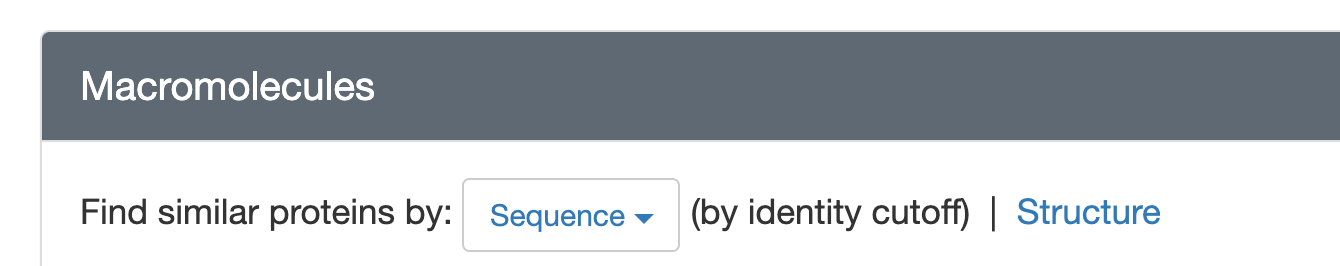

In [1]:
from IPython.display import Image
DATADIR = '/project/jhllei001/JHL_data/CBR_teaching/'
Image(filename='{}LAB00_FIG00.png'.format(DATADIR))

13.	The top one should be your protein.
•	Write down the accession of the next most similar one 
•	In the case of a GPCR target, ignore the T4Lysozyme hits
14.	Go to: https://www.ncbi.nlm.nih.gov/Structure/icn3d/full.html use align and select structure to structure. 


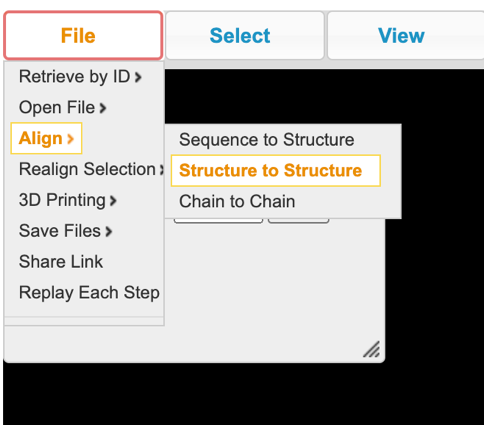

In [2]:
Image(filename='{}LAB00_FIG01.png'.format(DATADIR))

15.	Input both pdb codes and click all matching molecules superposed.

16.	After completion do file  realign and select ‘on sequence alignment’ 

17.	Select the ‘A’ chains and click realign. Note the RMSD below (realignment RMSD). 

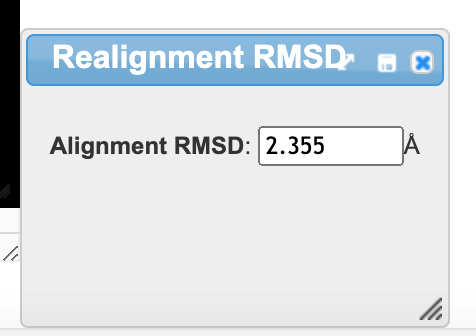

In [3]:
Image(filename='{}LAB00_FIG02.png'.format(DATADIR))

18.	Make a screenshot of the superposition. 

Next, we will prepare our protein. We will add hydrogen atoms to the structure, because these are normally not resolved in the structure (due to limitations in resolution of the experimental method.

19. First, we make a working directory:

In [4]:
import os
from pathlib import Path
HOMEDIR = str(Path.home())
os.chdir(HOMEDIR)
# We need to check whether the directory is there
try:
    os.mkdir('Bioinformatics')
except:
    print("Directory already exists")
os.chdir('Bioinformatics')

20. Next, we load the protein using pdbtools (http://www.bonvinlab.org/pdb-tools/), and save all the ligands and protein seperately:

In [5]:
import glob
BINDIR = '/project/jhllei001/JHL_installations/venvs/Docking/bin'
RCSB_CODE = '4eiy' # Fill in the accession code here, example: 4eiy

# Fetch the pdb file
command = '{}/pdb_fetch {} > {}.pdb'.format(BINDIR,RCSB_CODE,RCSB_CODE)
os.system(command)

# Save all the ligands seperately
from Bio.PDB import PDBParser, PDBIO, Select

savedir = '{}-ligands'.format(RCSB_CODE)
try:
    os.mkdir(savedir)
    
except:
    print("Directory exists")
    
def is_het(residue):
    res = residue.id[0]
    return res != " " and res != "W"

class ResidueSelect(Select):
    def __init__(self, chain, residue):
        self.chain = chain
        self.residue = residue

    def accept_chain(self, chain):
        return chain.id == self.chain.id

    def accept_residue(self, residue):
        """ Recognition of heteroatoms - Remove water molecules """
        return residue == self.residue and is_het(residue)

def extract_ligands(path):
    """ Extraction of the heteroatoms of .pdb files """
    pdb = PDBParser().get_structure('pdbobject','{}.pdb'.format(RCSB_CODE))
    io = PDBIO()
    io.set_structure(pdb)
    i = 0
    for model in pdb:
        for chain in model:
            for residue in chain:
                if not is_het(residue):
                    continue
                io.save('{}/lig_{}_{}.mol2'.format(savedir,
                                                  RCSB_CODE,
                                                  i), 
                        ResidueSelect(chain, residue)
                       )
                i += 1


# Main
path = os.curdir

extract_ligands(path)

print(glob.glob('*.pdb'))
print(glob.glob('{}/*.pdb'.format(savedir)))

['4eiy.pdb']
[]


If all goes well, the above code has printed out a list of all the pdb files in your directory, make sure that you have the correct .pdb file! The ligand folder might be quite full, depending on how much was co-crystalized. We will search for the ligand in a next step.

Now, we can prepare the protein, we will use LePro for this, which is part of the LeDock program (https://en.wikipedia.org/wiki/LeDock).

21. Prepare the protein:

In [6]:
import shutil
HOMEDIR = str(Path.home())
PDBCODE = '4eiy' # fill in the PDB code, example 4eiy
command = '{}/bin/lepro {}.pdb'.format(HOMEDIR,PDBCODE)
os.system(command)
shutil.move('pro.pdb','{}_prepped.pdb'.format(PDBCODE))
print(glob.glob('*.pdb'))

['4eiy.pdb', '4eiy_prepped.pdb']


The above code should have printed out two pdb files.

22. Now let's have a look at the protein, we will use py3Dmol (https://github.com/avirshup/py3dmol) for this:

In [7]:
import py3Dmol
LOADFILE = '{}_prepped.pdb'.format(PDBCODE)
view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

view.addModel(open(LOADFILE,'r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})
#Prot.setStyle({'stick':{'colorscheme':'magentaCarbon'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'})

for ligand in glob.glob('{}-ligands/*.pdb'.format(PDBCODE)):
    view.addModelsAsFrames(open(ligand,'r').read(),format='pdb')
    ref_m = view.getModel()
    ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})
    # In principle the ligand should be the first entry
    break
#view.addResLabels(hetflag=True)      
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Have a look at the structure, and if you are not sure, check with one of the teachers if you indeed have the ligand identified. Normally the first entry in the pdb file is for the ligand, but if this is not the case we will have to do a small adjustment to the code to identify it. IMPORTANT: write down the filename of the ligand.pdb file, we will need it later.

You can also browse on the RCSB website, read the paper and double check what is the co-crystallized ligand. Add a small paragraph on this in your report.

You can move around the structure with the mouse. Scrolling will zoom in/out, with the left mouse button you can rotate the structure. If you click the scrolling wheel you can move around the structure (sliding).

23. Now, we will repeat the procedure for the most similar target that you identified (the highest scoring hit from the PDB):

In [8]:
import glob
BINDIR = '/project/jhllei001/JHL_installations/venvs/Docking/bin'
RCSB_CODE = '5uen' # Fill in the accession code here, example: 5uen

# Fetch the pdb file
command = '{}/pdb_fetch {} > {}.pdb'.format(BINDIR,RCSB_CODE,RCSB_CODE)
os.system(command)

# Save all the ligands seperately
from Bio.PDB import PDBParser, PDBIO, Select

savedir = '{}-ligands'.format(RCSB_CODE)
try:
    os.mkdir(savedir)
    
except:
    print("Directory exists")
    
def is_het(residue):
    res = residue.id[0]
    return res != " " and res != "W"

class ResidueSelect(Select):
    def __init__(self, chain, residue):
        self.chain = chain
        self.residue = residue

    def accept_chain(self, chain):
        return chain.id == self.chain.id

    def accept_residue(self, residue):
        """ Recognition of heteroatoms - Remove water molecules """
        return residue == self.residue and is_het(residue)

def extract_ligands(path):
    """ Extraction of the heteroatoms of .pdb files """
    pdb = PDBParser().get_structure('pdbobject','{}.pdb'.format(RCSB_CODE))
    io = PDBIO()
    io.set_structure(pdb)
    i = 0
    for model in pdb:
        for chain in model:
            for residue in chain:
                if not is_het(residue):
                    continue
                io.save('{}/lig_{}_{}.pdb'.format(savedir,
                                                  RCSB_CODE,
                                                  i), 
                        ResidueSelect(chain, residue)
                       )
                i += 1


# Main
path = os.curdir

extract_ligands(path)

print(glob.glob('*.pdb'))
print(glob.glob('{}/*.pdb'.format(savedir)))

['4eiy.pdb', '4eiy_prepped.pdb', '5uen.pdb']
['5uen-ligands/lig_5uen_0.pdb', '5uen-ligands/lig_5uen_1.pdb', '5uen-ligands/lig_5uen_2.pdb', '5uen-ligands/lig_5uen_3.pdb', '5uen-ligands/lig_5uen_4.pdb', '5uen-ligands/lig_5uen_5.pdb', '5uen-ligands/lig_5uen_6.pdb', '5uen-ligands/lig_5uen_7.pdb', '5uen-ligands/lig_5uen_8.pdb']


/project/jhllei001/JHL_installations/venvs/Docking/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12731.
  warnings.warn(
/project/jhllei001/JHL_installations/venvs/Docking/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12832.
  warnings.warn(


24. Prepare the protein

In [9]:
import shutil
HOMEDIR = str(Path.home())
PDBCODE = '5uen' # fill in the PDB code, example 4eiy
command = '{}/bin/lepro {}.pdb'.format(HOMEDIR,PDBCODE)
os.system(command)
shutil.move('pro.pdb','{}_prepped.pdb'.format(PDBCODE))
print(glob.glob('*.pdb'))

['4eiy.pdb', '4eiy_prepped.pdb', '5uen.pdb', '5uen_prepped.pdb']


25. And load the structure in the viewer

In [10]:
LOADFILE = '{}_prepped.pdb'.format(PDBCODE)
view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

view.addModel(open(LOADFILE,'r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})
#Prot.setStyle({'stick':{'colorscheme':'magentaCarbon'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'})

for ligand in glob.glob('{}-ligands/*.pdb'.format(PDBCODE)):
    view.addModelsAsFrames(open(ligand,'r').read(),format='pdb')
    ref_m = view.getModel()
    ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})
    # In principle the ligand should be the first entry
    break
#view.addResLabels(hetflag=True)      
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Now, it would be nice to also compare the structures. For this we will need to load both strcutre files in the same session.

26. Load both proteins

In [11]:
PDBCODE_1 = '4eiy' # Name of the first structure
PDBCODE_2 = '5uen' # Name of the second structure

LOADFILE1 = '{}_prepped.pdb'.format(PDBCODE_1)
LOADFILE2 = '{}_prepped.pdb'.format(PDBCODE_2)

view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

for loadfile in [LOADFILE1,LOADFILE2]:
    view.addModel(open(loadfile,'r').read(),format='pdb')
    Prot=view.getModel()
    Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})
    #Prot.setStyle({'stick':{'colorscheme':'magentaCarbon'}})
    view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'})


view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Are the structures nicely aligned?

Typically this is not the case, and for comparison it is useful to actually align the structures. You can do this on https://www.ncbi.nlm.nih.gov/Structure/icn3d/full.html as you've seen previously.

You can also have a look at PLIP, which is a nice interaction profiler as well:
https://plip-tool.biotec.tu-dresden.de/plip-web/plip/index

Finally, the interaction viewer on rcsb itself is also quite good, just type in your accession code in the search bar, scroll down to the ligand overview and click the ligand interaction box.

Toy around a bit with the structures and see if you can get a feeling for the binding site. In particular what kind of interactions seem to be important. Feel free to discuss this with your supervisor as well!

Another great way to look at the structure is on the rcsb website itself, where you can go to a 3D viewer of the ligand binding site by clicking on the Ligand interaction button. 

27. We can also generate a sequence alignment to see how similar the proteins are, please report the output of the below alignment in your report:


In [13]:
from Bio import pairwise2
from Bio.Seq import Seq 
# Get the structures
PDBCODE_1 = '4eiy' # Name of the first structure
PDBCODE_2 = '5uen' # Name of the second structure

import requests
data = requests.get(f'https://www.ebi.ac.uk/pdbe/api/pdb/entry/molecules/{PDBCODE_1}').json()[PDBCODE_1.lower()]
SEQ1 = (data[0]['sequence'])
SEQ1 = Seq(SEQ1)

data = requests.get(f'https://www.ebi.ac.uk/pdbe/api/pdb/entry/molecules/{PDBCODE_2}').json()[PDBCODE_2.lower()]
SEQ2 = (data[0]['sequence'])
SEQ2 = Seq(SEQ2)

alignments = pairwise2.align.globalxx(SEQ1, SEQ2)

for align1, align2, score, begin, end in alignments:
    filename = "alignment.fasta"
    with open(filename, "w") as handle:
        handle.write(">SEQ1\n%s\n>SEQ2\n%s\n" % (align1, align2))

print(alignments[0])

Alignment(seqA='MKTIIAL----SYIFCLV--F-ADYKDDDDGAPP-IMGSSVYITVELAIAVLAI-L----GNVLVC-WAVWLNS--NLQNV-----TNYFV---VSLAA-ADI-AVGVLA--IPF-AIT-IST--G----FCAACHG-CLFI--ACF-VLV-LTQSSIFSL-L-AIAI-DRYIAI-R--IPLRYNGL--VTG-T-R-AKGIIA--I--CWV-LSFAI--GLTPML-GWNNCGQPK----E------GKNHSQGC-GEGQ-VA--CL-FEDV-VP--MN-YMVYFNFFACVL-V-P-LLLMLGVYLRI----F-LAAR-R-QLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLANEGKVKEAQAAAEQLKTTRNAYIQKYLERARSTLQKEVHA---AKSLAI-IVGLF--ALC-WLPLHII-NCF-TF-FCPDCS-HA-PLW--LM-YL-AIV-LSHT--NSVV--NPFI-YAY-RIRE--FRQ-TFR-KIIRS---HVL-RQ-QEP----FKAHHHHHHHHHH-', seqB='-------GPPPS-I----SAFQA--------A--YI-G----I--E----VL-IALVSVPGNVLV-IWAV----KVN-Q--ALRDAT--F-CFIVSL-AVAD-VAVG--ALVIP-LAI-LI--NIGPQTYF----H-TCL--MVAC-PVL-ILTQSSI--LALLAIA-VDRY---LRVKIPLRY---KMV--VTPRRA----AVAIAGCW-ILSF--VVGLTPM-FGWNN-----LSAVERAWAAAG---S---MGE--PV-IKC-EFE--KV-ISM-EYMVYFNFF--V-WVLPPLLLM--V-L-IYLEVFYL---IRKQLADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPPKLEDKSPDSPEMKDFRHGFDILVGQIDDALKLAN

This is the end of the bioinformatics part of the lab, for the report, please add a screenshot of the PLIP viewer. Try to identify key interactions in the binding site, either on the RCSB website or PLIP. Also think already how you might improve the ligand, can you think of additional interactions? The next two days, we will try to optimize the ligand. Tomorrow we will work with QSAR and cheminformatics. The day after we will use docking